symbol  #

Refer to kaggle for some of the info abt the values in the dataset: https://www.kaggle.com/datasets/ruchi798/housing-prices-in-metropolitan-areas-of-india

refer to https://docs.google.com/document/d/1yYUgte33HXMTPtl4o__8KIM1815iXd0lRglfojdgSnk/edit?usp=drivesdk, and FAI machine learning flow (rmb to feature engineering by geeks for geeks)

Low Sim Chuan (TP065697) <br>
Objective: To analyze and predict the trend of house prices in different metropolitan areas.<br>
Scopes/Deliverables:<br>
-	Analyze the distribution of house prices across different metropolitan areas. <br>
-	Perform correlation analysis between the area of the house and its price.<br>
-	Assess the impact of the amenities on house prices.<br>
-	Compare the prices of resale properties with new properties.<br>
-	Build, train, and tune the models to predict house prices based on historical and current data.<br>
-	Build, train, and tune the models to predict the likelihood of resale properties and their price premiums  based on historical and current data.<br>


# Loading the dataset

In [1]:
import pandas as pd
path_bangalore = "real_estate_india\Bangalore.csv"
path_chennai = "real_estate_india\Chennai.csv"
path_delhi = "real_estate_india\Delhi.csv"
path_hyderabad = "real_estate_india\Hyderabad.csv"
path_kolkata = "real_estate_india\Kolkata.csv"
path_mumbai = "real_estate_india\Mumbai.csv"
df_bangalore = pd.read_csv(path_bangalore)
df_chennai = pd.read_csv(path_chennai)
df_delhi = pd.read_csv(path_delhi)
df_hyderabad = pd.read_csv(path_hyderabad)
df_kolkata = pd.read_csv(path_kolkata)
df_mumbai = pd.read_csv(path_mumbai)
df_bangalore["metropolitan_area"] = "Bangalore"
df_chennai["metropolitan_area"] = "Chennai"
df_delhi["metropolitan_area"] = "Delhi"
df_hyderabad["metropolitan_area"] = "Hyderabad"
df_kolkata["metropolitan_area"] = "Kolkata"
df_mumbai["metropolitan_area"] = "Mumbai"
ds = pd.concat([df_bangalore, df_chennai, df_delhi, df_hyderabad, df_kolkata, df_mumbai], ignore_index=True, axis=0)
print(ds.shape)

(32975, 41)


In [2]:
ds.columns

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator', 'metropolitan_area'],
      dtype='object')

# Data Preprocessing

## Data Cleaning

### Noisy (Error)

In [3]:
rows_with_unusual_num_bedrooms = ds[ds["No. of Bedrooms"] <= 0]
print(rows_with_unusual_num_bedrooms.shape[0])

12


In [4]:
ds.drop(rows_with_unusual_num_bedrooms.index, inplace=True)

In [5]:
ds[ds["Price"] <= 0].shape[0]

0

In [6]:
ds[ds["Area"] <= 0].shape[0]

0

In [7]:
ds[(ds["Resale"] != 0) & (ds["Resale"] != 1)].shape[0]

0

In [8]:
for amenity in ds.columns[5:40]:
    print(f"For col `{amenity}`, num of noisy data = ", ds[(ds[amenity] != 0) & (ds[amenity] != 1) & (ds[amenity] != 9)].shape[0])

For col `MaintenanceStaff`, num of noisy data =  0
For col `Gymnasium`, num of noisy data =  0
For col `SwimmingPool`, num of noisy data =  0
For col `LandscapedGardens`, num of noisy data =  0
For col `JoggingTrack`, num of noisy data =  0
For col `RainWaterHarvesting`, num of noisy data =  0
For col `IndoorGames`, num of noisy data =  0
For col `ShoppingMall`, num of noisy data =  0
For col `Intercom`, num of noisy data =  0
For col `SportsFacility`, num of noisy data =  0
For col `ATM`, num of noisy data =  0
For col `ClubHouse`, num of noisy data =  0
For col `School`, num of noisy data =  0
For col `24X7Security`, num of noisy data =  0
For col `PowerBackup`, num of noisy data =  0
For col `CarParking`, num of noisy data =  0
For col `StaffQuarter`, num of noisy data =  0
For col `Cafeteria`, num of noisy data =  0
For col `MultipurposeRoom`, num of noisy data =  0
For col `Hospital`, num of noisy data =  0
For col `WashingMachine`, num of noisy data =  0
For col `Gasconnection`, 

### Data inspection and exploration

In [9]:
ds[["Price", "Area", "No. of Bedrooms"]].describe()

,Price,Area,No. of Bedrooms
count,3.296300e+04,32955.000000,32956.000000
mean,1.168672e+07,1293.376149,2.411791
std,2.307368e+07,763.781984,0.812820
min,2.000000e+06,200.000000,1.000000
25%,4.071500e+06,853.000000,2.000000
50%,6.711000e+06,1125.000000,2.000000
75%,1.200000e+07,1500.000000,3.000000
max,8.546000e+08,16000.000000,9.000000


### Handling missing data

In [10]:
from numpy import nan
# replacing 9 by NaN
for i in range(5, 40):
    ds.iloc[:, i].replace(9, nan, inplace=True)
for i in range(5, 40):
    print(f"For col {ds.columns[i]}, percentage of missing val = " + str((ds.iloc[:, i].isnull().sum() * 100)/ds.shape[0]) + "%")

For col MaintenanceStaff, percentage of missing val = 69.38082092042593%
For col Gymnasium, percentage of missing val = 69.38082092042593%
For col SwimmingPool, percentage of missing val = 69.38082092042593%
For col LandscapedGardens, percentage of missing val = 69.38082092042593%
For col JoggingTrack, percentage of missing val = 69.38082092042593%
For col RainWaterHarvesting, percentage of missing val = 69.38082092042593%
For col IndoorGames, percentage of missing val = 69.38082092042593%
For col ShoppingMall, percentage of missing val = 69.38082092042593%
For col Intercom, percentage of missing val = 69.38082092042593%
For col SportsFacility, percentage of missing val = 69.38082092042593%
For col ATM, percentage of missing val = 69.38082092042593%
For col ClubHouse, percentage of missing val = 69.38082092042593%
For col School, percentage of missing val = 69.38082092042593%
For col 24X7Security, percentage of missing val = 69.38082092042593%
For col PowerBackup, percentage of missing

In [11]:
print(f"For col Price, percentage of missing val = " + str((ds["Price"].isnull().sum() * 100)/ds.shape[0]) + "%")
print(f"For col Area, percentage of missing val = " + str((ds["Area"].isnull().sum() * 100)/ds.shape[0]) + "%")
print(f"For col Location, percentage of missing val = " + str((ds["Location"].isnull().sum() * 100)/ds.shape[0]) + "%")
print(f"For col No. of Bedrooms, percentage of missing val = " + str((ds["No. of Bedrooms"].isnull().sum() * 100)/ds.shape[0]) + "%")
print(f"For col Resale, percentage of missing val = " + str((ds["Resale"].isnull().sum() * 100)/ds.shape[0]) + "%")

For col Price, percentage of missing val = 0.0%
For col Area, percentage of missing val = 0.024269635652094772%
For col Location, percentage of missing val = 0.02730334010860662%
For col No. of Bedrooms, percentage of missing val = 0.021235931195582928%
For col Resale, percentage of missing val = 0.0%


Coorelation between Price and Area = 0.2950602112750889
Skewness of `Area` =  3.500483434418256
Median area =  1125.0


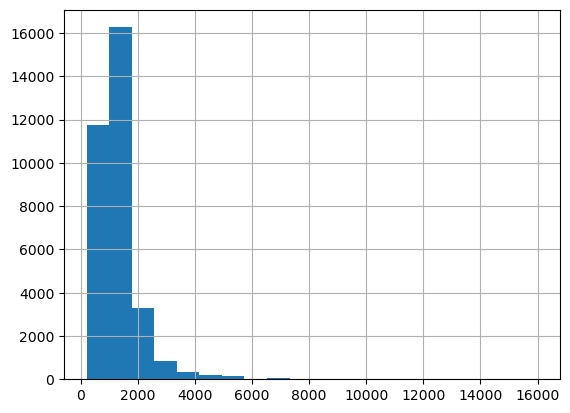

In [12]:
print("Coorelation between Price and Area = " + str(ds["Price"].corr(ds["Area"])))
ds["Area"].hist(bins=20)
print("Skewness of `Area` = ", ds["Area"].skew())
# median imputation
median_area = ds['Area'].median()
ds['Area'].fillna(median_area, inplace=True)
print("Median area = ", median_area)

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# selecting relevant features
tree_ds = ds[["Price", "Location", "No. of Bedrooms"]]
# Assigning unique label to col `Location` of tree_ds
label_encoder = LabelEncoder()
train_data = tree_ds.dropna()
train_data['Location'] = label_encoder.fit_transform(train_data['Location'])
# print("sum of NA in `Location` = ", ds["Location"].isnull().sum())
# print("sum of NA in `Location` in tree_ds = ", tree_ds["Location"].isnull().sum())
# print("sum of NA in `Location` in tree_ds = ", tree_ds["Location"].isnull().sum())
missing_data_location = tree_ds[tree_ds["Location"].isnull()]

# Train a Decision Tree Classifier for imputing `Location`
model_loc = DecisionTreeClassifier()
model_loc.fit(train_data[['Price', 'No. of Bedrooms']], train_data['Location'])
# Impute the `Location` by predicting the missing values
predicted_locs = model_loc.predict(missing_data_location[['Price', 'No. of Bedrooms']])
# `inverse_transform()` is to convert the numeric labels into original categories
ds.loc[ds['Location'].isnull(), 'Location'] = label_encoder.inverse_transform(predicted_locs)
# Check after imputation
print(f"After imputation, For col Location, percentage of missing val = " + str((ds["Location"].isnull().sum() * 100)/ds.shape[0]) + "%")

C:\Users\User\AppData\Local\Temp\ipykernel_19268\972570031.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Location'] = label_encoder.fit_transform(train_data['Location'])


After imputation, For col Location, percentage of missing val = 0.0%


In [14]:
# dropping records with NaN in column `No. of Bedrooms`
print(ds.shape)
ds.dropna(subset=['No. of Bedrooms'], inplace=True)
print(ds.shape)

(32963, 41)
(32956, 41)


### Handling outliers

Ways of detecting outliers:
- Manual inspection, such as someone is recorded as 1001 years old
- Boxplot
- Regression line to visualise it, then catch the outliers manually


In [15]:
import matplotlib.pyplot as plt
def get_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    return outliers

def get_non_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    non_outliers = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return non_outliers

def get_super_pricey_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[df[column_name] > upper_bound]
    return outliers

def get_super_cheap_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    outliers = df[df[column_name] < lower_bound]
    return outliers

def plot_boxplot(df, column_name, title):
    plt.figure(figsize=(10, 6))
    df.boxplot(column=column_name)
    plt.title(title)
    plt.show()

No. of outliers in Bangalore 621


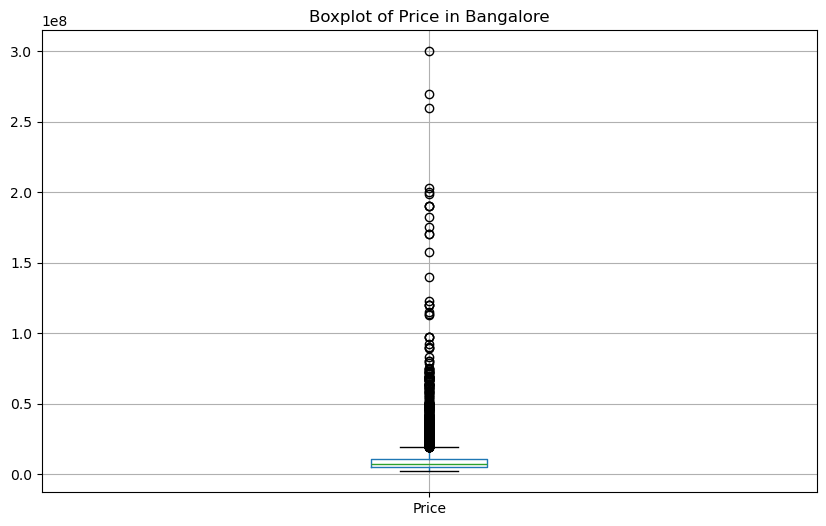

No. of non-outliers in Bangalore =  5584
Dropped 465 rows!


In [16]:
# For handling outliers in Bangalore
outliers_bangalore = get_outliers(ds[ds["metropolitan_area"] == "Bangalore"], "Price")
print("No. of outliers in Bangalore", outliers_bangalore.shape[0])
plot_boxplot(ds[ds["metropolitan_area"] == "Bangalore"], "Price", "Boxplot of Price in Bangalore")

pricey_outliers_bangalore = get_super_pricey_outliers(ds[ds["metropolitan_area"] == "Bangalore"], "Price")
pricey_outliers_bangalore["Area"].describe()

non_outliers_bangalore = get_non_outliers(ds[ds["metropolitan_area"] == "Bangalore"], "Price")
print("No. of non-outliers in Bangalore = ", non_outliers_bangalore.shape[0])
non_outliers_bangalore["Area"].describe()

area_threshold_bangalore = 3044
rows_to_drop = pricey_outliers_bangalore[pricey_outliers_bangalore["Area"] < area_threshold_bangalore]
prev_len = ds.shape[0]
indexes_to_drop = rows_to_drop.index.tolist()
ds.drop(index=indexes_to_drop, inplace=True)
cur_len = ds.shape[0]
print(f"Dropped {str(prev_len - cur_len)} rows!")

No. of outliers in Chennai 559


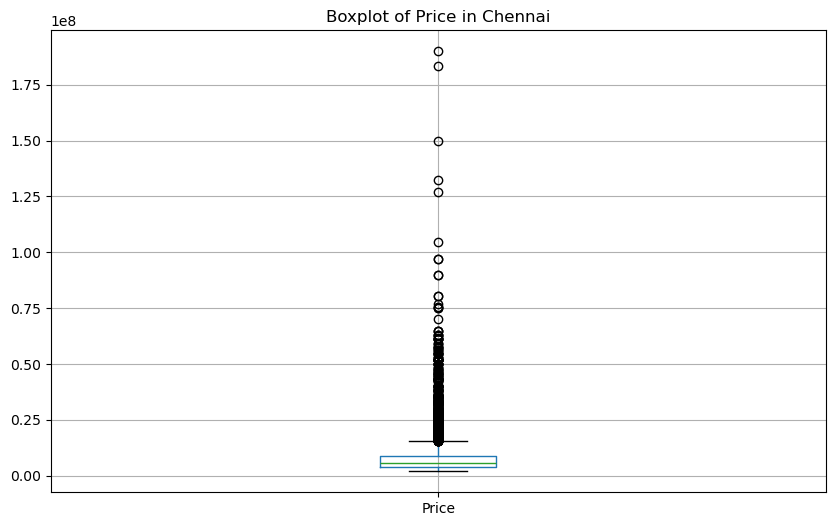

count     559.000000
mean     1869.071556
std      1025.797365
min       450.000000
25%      1215.000000
50%      1636.000000
75%      2324.500000
max      7240.000000
Name: Area, dtype: float64
No. of non-outliers in Chennai =  4455
count    4455.000000
mean     1153.178676
std       524.104662
min       362.000000
25%       850.000000
50%      1030.000000
75%      1323.000000
max      6250.000000
Name: Area, dtype: float64
Dropped 278 rows!


In [17]:
# For handling outliers in Chennai
outliers_chennai = get_outliers(ds[ds["metropolitan_area"] == "Chennai"], "Price")
print("No. of outliers in Chennai", outliers_chennai.shape[0])
plot_boxplot(ds[ds["metropolitan_area"] == "Chennai"], "Price", "Boxplot of Price in Chennai")

pricey_outliers_chennai = get_super_pricey_outliers(ds[ds["metropolitan_area"] == "Chennai"], "Price")
print(pricey_outliers_chennai["Area"].describe())

non_outliers_chennai = get_non_outliers(ds[ds["metropolitan_area"] == "Chennai"], "Price")
print("No. of non-outliers in Chennai = ", non_outliers_chennai.shape[0])
print(non_outliers_chennai["Area"].describe())

area_threshold_chennai = 1636
rows_to_drop = pricey_outliers_chennai[pricey_outliers_chennai["Area"] < area_threshold_chennai]
prev_len = ds.shape[0]
indexes_to_drop = rows_to_drop.index.tolist()
ds.drop(index=indexes_to_drop, inplace=True)
cur_len = ds.shape[0]
print(f"Dropped {str(prev_len - cur_len)} rows!")

No. of outliers in Delhi 245


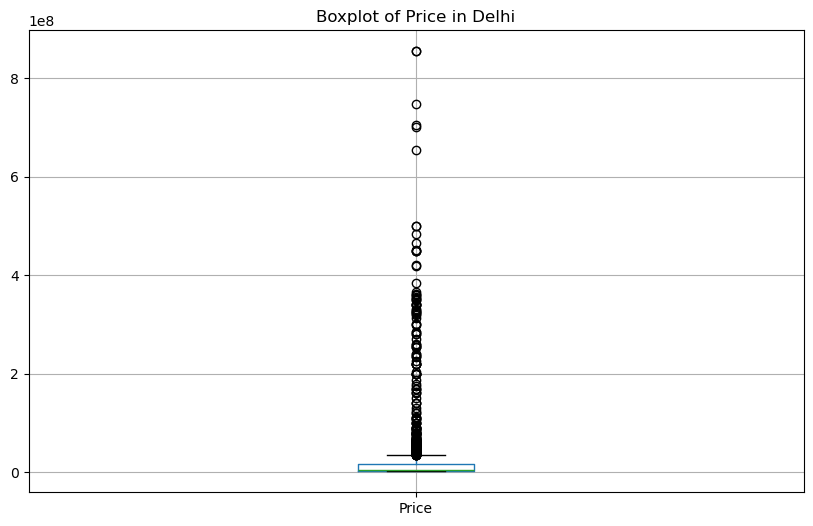

count      245.000000
mean      2478.755102
std       2022.165427
min        240.000000
25%       1200.000000
50%       1800.000000
75%       2645.000000
max      12552.000000
Name: Area, dtype: float64
No. of non-outliers in Delhi =  4753
count     4753.000000
mean      1215.415317
std        769.799425
min        200.000000
25%        800.000000
50%       1000.000000
75%       1600.000000
max      16000.000000
Name: Area, dtype: float64
Dropped 120 rows!


In [18]:
# For handling outliers in Delhi
outliers_delhi = get_outliers(ds[ds["metropolitan_area"] == "Delhi"], "Price")
print("No. of outliers in Delhi", outliers_delhi.shape[0])
plot_boxplot(ds[ds["metropolitan_area"] == "Delhi"], "Price", "Boxplot of Price in Delhi")

pricey_outliers_delhi = get_super_pricey_outliers(ds[ds["metropolitan_area"] == "Delhi"], "Price")
print(pricey_outliers_delhi["Area"].describe())

non_outliers_delhi = get_non_outliers(ds[ds["metropolitan_area"] == "Delhi"], "Price")
print("No. of non-outliers in Delhi = ", non_outliers_delhi.shape[0])
print(non_outliers_delhi["Area"].describe())

area_threshold_delhi = 1800
rows_to_drop = pricey_outliers_delhi[pricey_outliers_delhi["Area"] < area_threshold_delhi]
prev_len = ds.shape[0]
indexes_to_drop = rows_to_drop.index.tolist()
ds.drop(index=indexes_to_drop, inplace=True)
cur_len = ds.shape[0]
print(f"Dropped {str(prev_len - cur_len)} rows!")

No. of outliers in Hyderabad 196


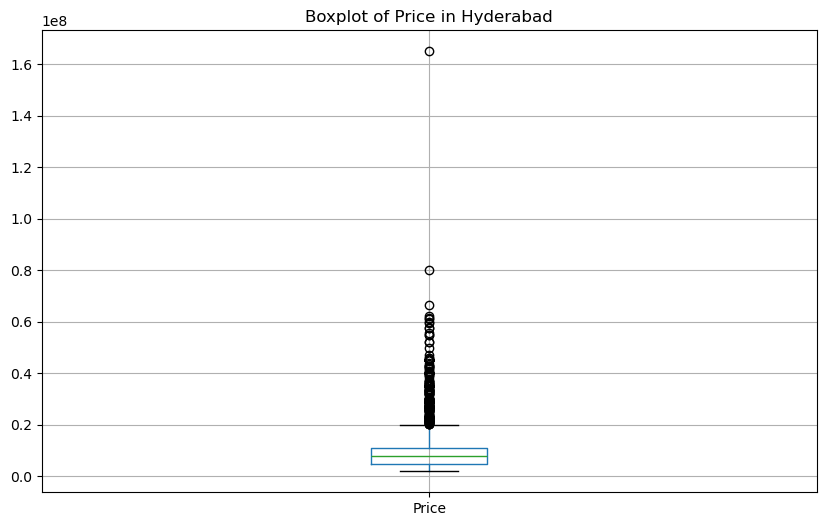

count     196.000000
mean     3493.086735
std      1055.677965
min      1045.000000
25%      3000.000000
50%      3380.000000
75%      4089.000000
max      9400.000000
Name: Area, dtype: float64
No. of non-outliers in Hyderabad =  2321
count    2321.000000
mean     1488.507109
std       444.427476
min       500.000000
25%      1150.000000
50%      1425.000000
75%      1705.000000
max      4500.000000
Name: Area, dtype: float64
Dropped 47 rows!


In [19]:
# For handling outliers in Hyderabad
outliers_Hyderabad = get_outliers(ds[ds["metropolitan_area"] == "Hyderabad"], "Price")
print("No. of outliers in Hyderabad", outliers_Hyderabad.shape[0])
plot_boxplot(ds[ds["metropolitan_area"] == "Hyderabad"], "Price", "Boxplot of Price in Hyderabad")

pricey_outliers_Hyderabad = get_super_pricey_outliers(ds[ds["metropolitan_area"] == "Hyderabad"], "Price")
print(pricey_outliers_Hyderabad["Area"].describe())

non_outliers_Hyderabad = get_non_outliers(ds[ds["metropolitan_area"] == "Hyderabad"], "Price")
print("No. of non-outliers in Hyderabad = ", non_outliers_Hyderabad.shape[0])
print(non_outliers_Hyderabad["Area"].describe())

area_threshold_Hyderabad = 3000
rows_to_drop = pricey_outliers_Hyderabad[pricey_outliers_Hyderabad["Area"] < area_threshold_Hyderabad]
prev_len = ds.shape[0]
indexes_to_drop = rows_to_drop.index.tolist()
ds.drop(index=indexes_to_drop, inplace=True)
cur_len = ds.shape[0]
print(f"Dropped {str(prev_len - cur_len)} rows!")

No. of outliers in Kolkata 518


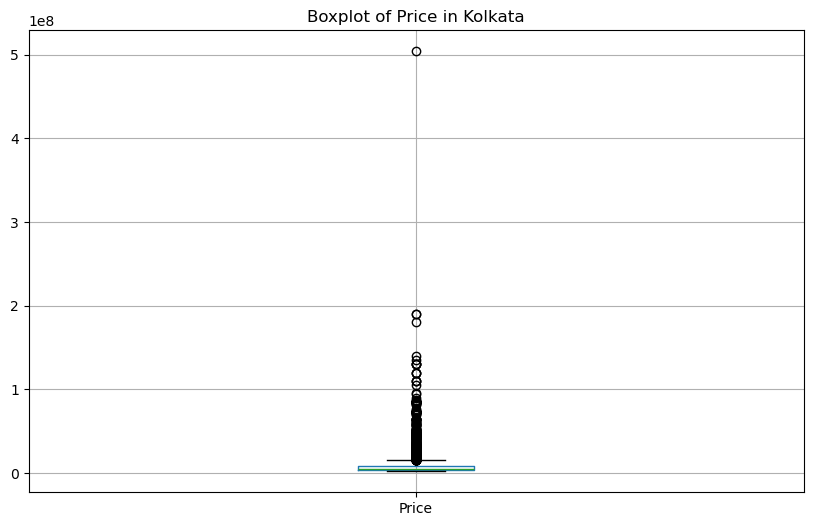

count     518.000000
mean     1866.349421
std      1341.550927
min       451.000000
25%       989.750000
50%      1349.000000
75%      1959.750000
max      5359.000000
Name: Area, dtype: float64
No. of non-outliers in Kolkata =  5987
count     5987.000000
mean      1299.004176
std        726.549967
min        350.000000
25%        919.000000
50%       1131.000000
75%       1445.000000
max      10000.000000
Name: Area, dtype: float64
Dropped 388 rows!


In [20]:
# For handling outliers in Kolkata
outliers_Kolkata = get_outliers(ds[ds["metropolitan_area"] == "Kolkata"], "Price")
print("No. of outliers in Kolkata", outliers_Kolkata.shape[0])
plot_boxplot(ds[ds["metropolitan_area"] == "Kolkata"], "Price", "Boxplot of Price in Kolkata")

pricey_outliers_Kolkata = get_super_pricey_outliers(ds[ds["metropolitan_area"] == "Kolkata"], "Price")
print(pricey_outliers_Kolkata["Area"].describe())

non_outliers_Kolkata = get_non_outliers(ds[ds["metropolitan_area"] == "Kolkata"], "Price")
print("No. of non-outliers in Kolkata = ", non_outliers_Kolkata.shape[0])
print(non_outliers_Kolkata["Area"].describe())

area_threshold_Kolkata = 1960
rows_to_drop = pricey_outliers_Kolkata[pricey_outliers_Kolkata["Area"] < area_threshold_Kolkata]
prev_len = ds.shape[0]
indexes_to_drop = rows_to_drop.index.tolist()
ds.drop(index=indexes_to_drop, inplace=True)
cur_len = ds.shape[0]
print(f"Dropped {str(prev_len - cur_len)} rows!")

No. of outliers in Mumbai 589


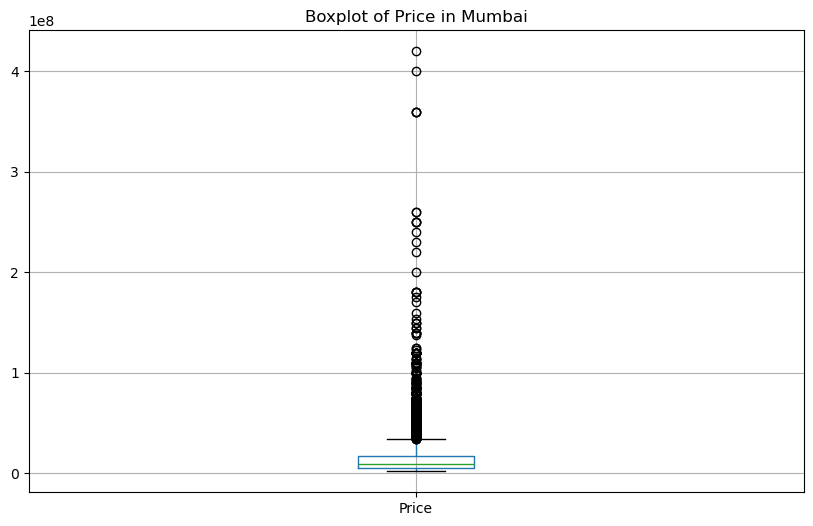

count     589.000000
mean     1416.606112
std       910.233059
min       250.000000
25%       830.000000
50%      1168.000000
75%      1705.000000
max      7000.000000
Name: Area, dtype: float64
No. of non-outliers in Mumbai =  7128
count    7128.000000
mean      963.794192
std       494.588764
min       200.000000
25%       641.000000
50%       885.000000
75%      1150.000000
max      8511.000000
Name: Area, dtype: float64
Dropped 294 rows!


In [21]:
# For handling outliers in Mumbai
outliers_Mumbai = get_outliers(ds[ds["metropolitan_area"] == "Mumbai"], "Price")
print("No. of outliers in Mumbai", outliers_Mumbai.shape[0])
plot_boxplot(ds[ds["metropolitan_area"] == "Mumbai"], "Price", "Boxplot of Price in Mumbai")

pricey_outliers_Mumbai = get_super_pricey_outliers(ds[ds["metropolitan_area"] == "Mumbai"], "Price")
print(pricey_outliers_Mumbai["Area"].describe())

non_outliers_Mumbai = get_non_outliers(ds[ds["metropolitan_area"] == "Mumbai"], "Price")
print("No. of non-outliers in Mumbai = ", non_outliers_Mumbai.shape[0])
print(non_outliers_Mumbai["Area"].describe())

area_threshold_Mumbai = 1168
rows_to_drop = pricey_outliers_Mumbai[pricey_outliers_Mumbai["Area"] < area_threshold_Mumbai]
prev_len = ds.shape[0]
indexes_to_drop = rows_to_drop.index.tolist()
ds.drop(index=indexes_to_drop, inplace=True)
cur_len = ds.shape[0]
print(f"Dropped {str(prev_len - cur_len)} rows!")

## Feature engineering

### Feature creation

In [22]:
# Calculate the sum of the three amenity columns
ds['Amenity_Sum'] = ds[ds.columns[5:40].tolist()].sum(axis=1)

# Create the `Amenities` column based on the sum
ds['Amenities'] = ds['Amenity_Sum'].apply(lambda x: 'High' if x >= 24 else ('Medium' if x >= 12 else ('Low' if x >= 1 else 'Unknown')))

# Drop the intermediate Amenity_Sum column if no longer needed
ds.drop(columns=['Amenity_Sum'], inplace=True)
cols_to_drop = ds.columns[5:40].tolist()
ds.drop(columns=cols_to_drop, inplace=True)

# EDA

EDA must solve the objectives proposed b4

https://mode.com/blog/violin-plot-examples

For violin plot on the distribution of house prices in each metro area.

## House Prices in Different Metropolitan Areas in India

In [23]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 9]

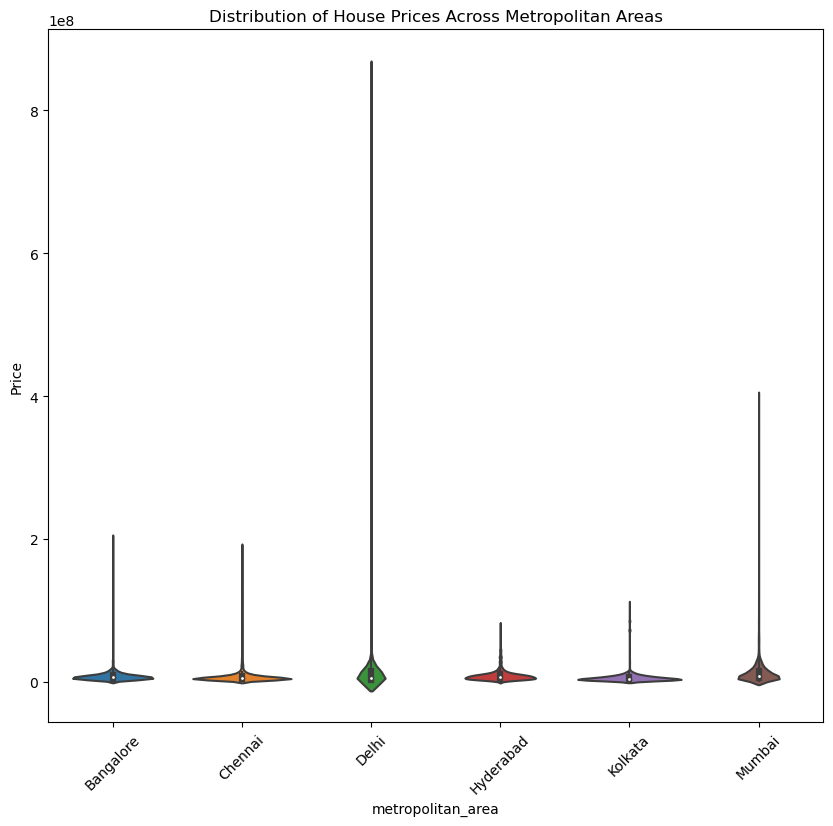

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Violin plot for house prices by metropolitan area
sns.violinplot(x='metropolitan_area', y='Price', data=ds)
plt.title('Distribution of House Prices Across Metropolitan Areas')
plt.xticks(rotation=45)
plt.show()

In [25]:
ds.groupby('metropolitan_area')["Price"].describe()

,count,mean,std,min,25%,50%,75%,max
metropolitan_area,,,,,,,,
Bangalore,5740.0,8.467228e+06,8.739762e+06,2000000.0,4864000.0,6981500.0,9454000.00,202700000.0
Chennai,4736.0,7.594206e+06,8.591162e+06,2000000.0,4000000.0,5550500.0,7932999.25,190000000.0
Delhi,4878.0,1.339888e+07,3.950295e+07,2000000.0,2895000.0,5300000.0,15500000.00,854599999.0
Hyderabad,2470.0,9.446409e+06,7.930101e+06,2000000.0,4748000.0,7560500.0,10600000.00,80000000.0
Kolkata,6117.0,6.475243e+06,8.443371e+06,2000000.0,3200000.0,4694000.0,7300000.00,110000000.0
Mumbai,7423.0,1.325688e+07,1.698361e+07,2000000.0,5155000.0,9100000.0,16000000.00,400000000.0


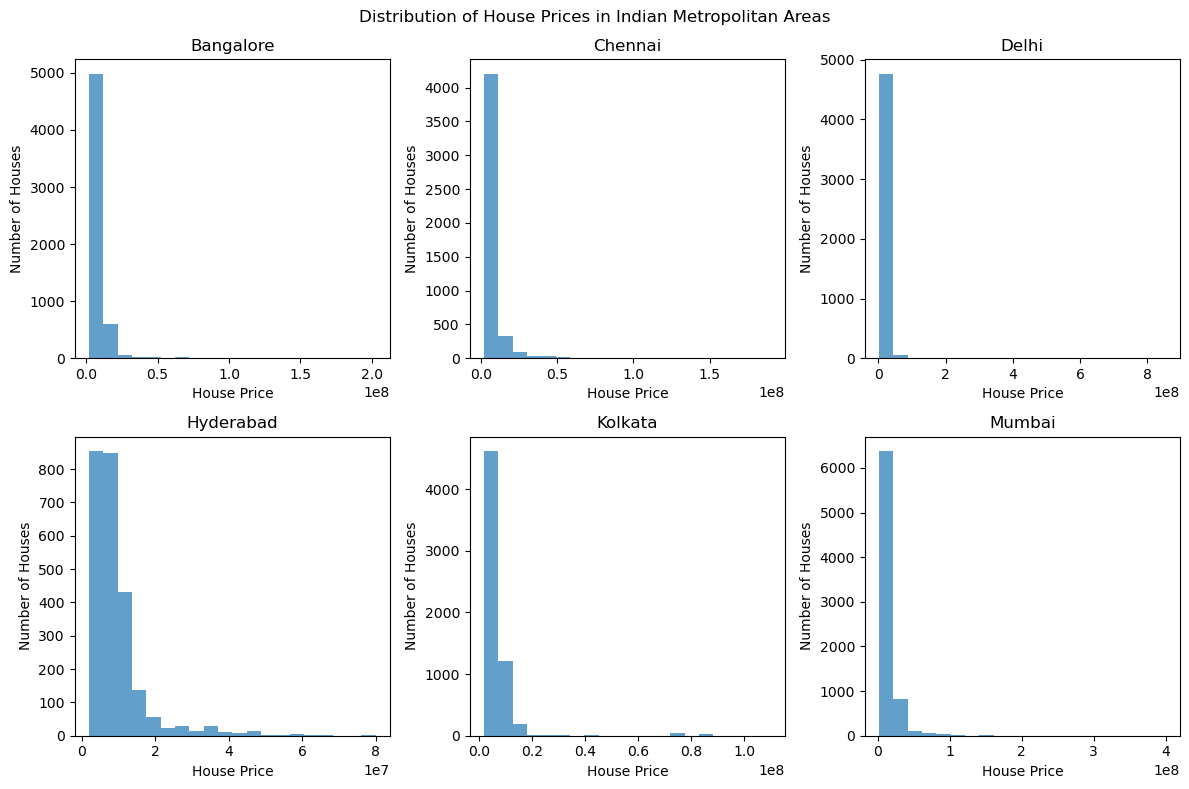

In [26]:
metro_areas = ["Bangalore", "Chennai", "Delhi", "Hyderabad", "Kolkata", "Mumbai"]
# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
fig.suptitle("Distribution of House Prices in Indian Metropolitan Areas")

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Create histograms for each city in subplots
for i, marea in enumerate(metro_areas):
    axes[i].hist(ds[ds["metropolitan_area"] == marea]["Price"], bins=20, alpha=0.7)
    axes[i].set_title(marea)
    axes[i].set_xlabel("House Price")
    axes[i].set_ylabel("Number of Houses")

# Adjust layout
plt.tight_layout()
plt.show()

## Correlation between Area of House and Price of House

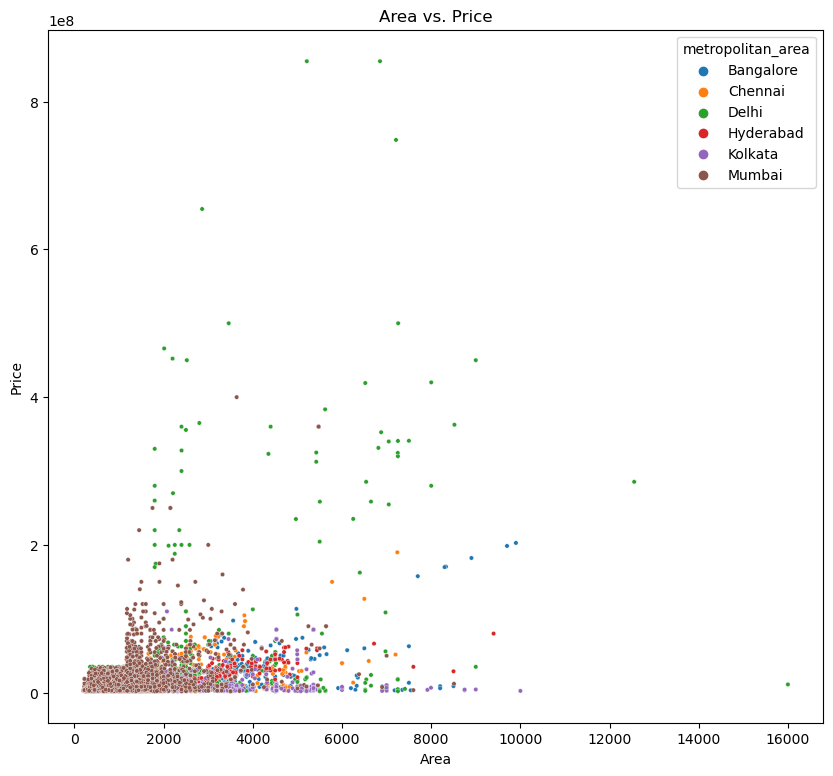

Correlation coefficient between Area and Price:
           Area     Price
Area   1.000000  0.381073
Price  0.381073  1.000000


In [27]:
sns.scatterplot(x='Area', y='Price', data=ds, hue='metropolitan_area', s=10)
plt.title('Area vs. Price')
plt.show()

corr = ds[['Area', 'Price']].corr()
print("Correlation coefficient between Area and Price:")
print(corr)

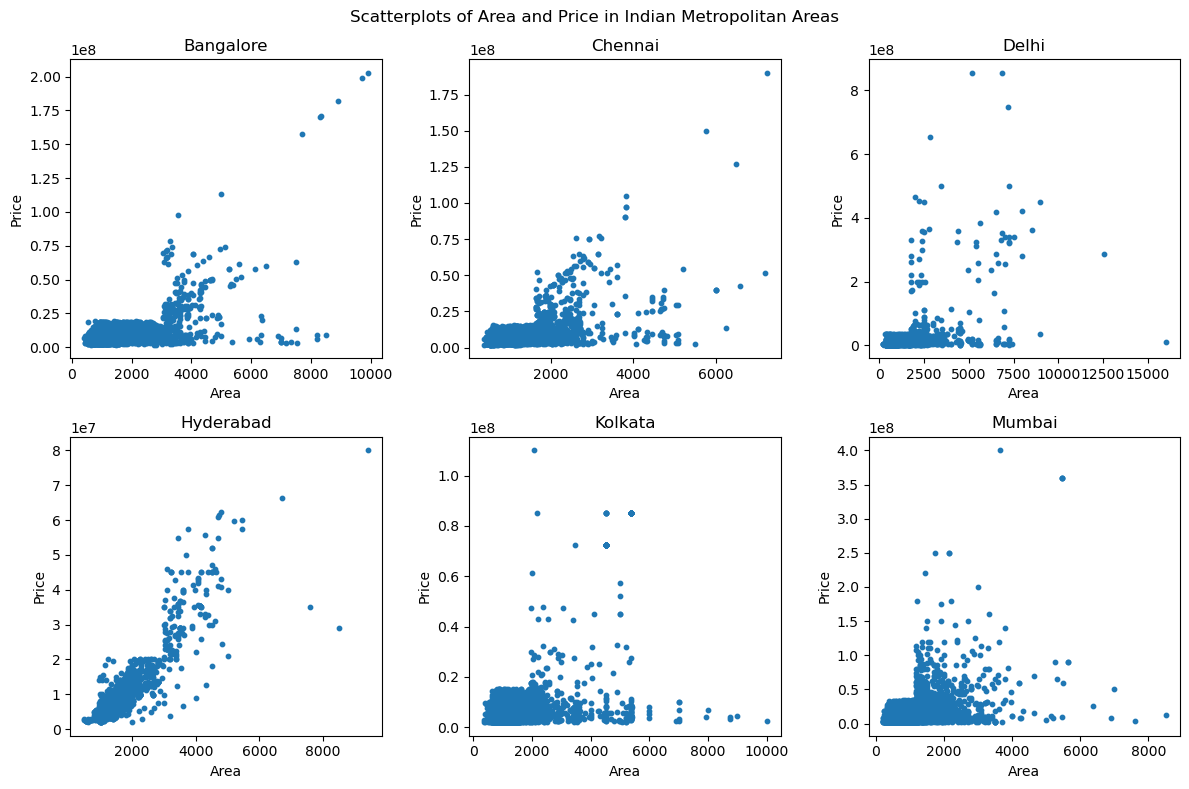

In [28]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
fig.suptitle("Scatterplots of Area and Price in Indian Metropolitan Areas")

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Create histograms for each city in subplots
for i, marea in enumerate(metro_areas):
    axes[i].scatter(x='Area', y='Price', data=ds[ds["metropolitan_area"] == marea], s=10)
    axes[i].set_title(marea)
    axes[i].set_xlabel("Area")
    axes[i].set_ylabel("Price")

# Adjust layout
plt.tight_layout()
plt.show()

In [29]:
for marea in metro_areas:
    corr = ds[ds["metropolitan_area"] == marea][['Area', 'Price']].corr()
    print(f"Correlation coefficient between Area and Price in {marea}:")
    print(corr)
    print()

Correlation coefficient between Area and Price in Bangalore:
           Area     Price
Area   1.000000  0.600802
Price  0.600802  1.000000

Correlation coefficient between Area and Price in Chennai:
          Area    Price
Area   1.00000  0.57492
Price  0.57492  1.00000

Correlation coefficient between Area and Price in Delhi:
           Area     Price
Area   1.000000  0.484139
Price  0.484139  1.000000

Correlation coefficient between Area and Price in Hyderabad:
           Area     Price
Area   1.000000  0.886313
Price  0.886313  1.000000

Correlation coefficient between Area and Price in Kolkata:
           Area     Price
Area   1.000000  0.461261
Price  0.461261  1.000000

Correlation coefficient between Area and Price in Mumbai:
           Area     Price
Area   1.000000  0.401833
Price  0.401833  1.000000



Maybe can do `Area` betw `Price` by segmenting the houses into new houses and resale houses

## Assess the Impact of the Amenities on House Prices

In [30]:
import scipy.stats as stats
# Perform one-way ANOVA
anova_result = stats.f_oneway(
    ds[ds['Amenities'] == 'Low']['Price'],
    ds[ds['Amenities'] == 'Medium']['Price'],
    ds[ds['Amenities'] == 'High']['Price'],
    ds[ds['Amenities'] == 'Unknown']['Price']
)

print('ANOVA Result:', anova_result)

ANOVA Result: F_onewayResult(statistic=30.408870155512805, pvalue=1.274135236448357e-19)


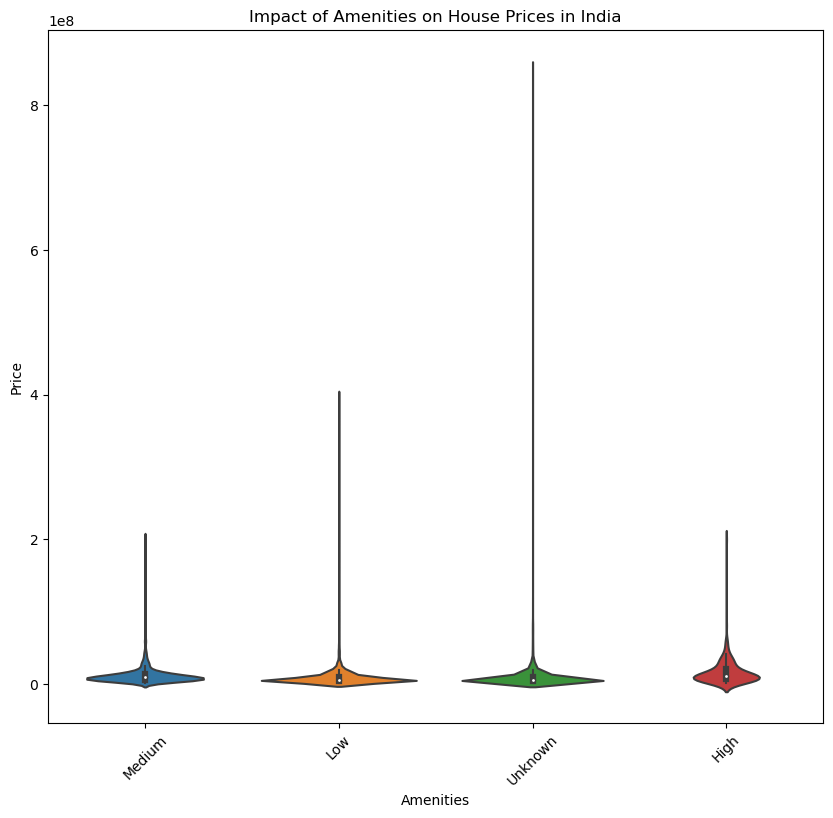

,count,mean,std,min,25%,50%,75%,max
Amenities,,,,,,,,
High,211.0,1.663083e+07,1.817008e+07,2116000.0,7200000.0,11100000.0,20800000.0,200000000.0
Low,5507.0,9.353208e+06,1.379049e+07,2000000.0,4236000.0,6300000.0,10300000.0,400000000.0
Medium,2765.0,1.263293e+07,1.414038e+07,2035000.0,6400000.0,9400000.0,13899999.0,202700000.0
Unknown,22881.0,9.673004e+06,2.056975e+07,2000000.0,3779999.0,6030000.0,10000000.0,854599999.0


In [37]:
sns.violinplot(x='Amenities', y='Price', data=ds)
plt.title('Impact of Amenities on House Prices in India')
plt.xticks(rotation=45)
plt.show()
ds.groupby(["Amenities"])["Price"].describe()

## Comparing the Prices of Resale Properties with New Properties

# Feature Engineering for Predictive Models

## Feature transformation

Such as transforming into normal distribution or what. Or feature transformation.

In [ ]:
label_encoder = LabelEncoder()
ds["Location"] = label_encoder.fit_transform(ds["Location"])
ds["metropolitan_area"] = label_encoder.fit_transform(ds["metropolitan_area"])
print(ds["metropolitan_area"].dtype)
print(ds["Location"].dtype)

## Feature selection

Correlation: Show output for and describe correlations between variables.

variance thresholding

Fisher score

# Building Models